In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as plt

import pandas
pandas.set_option('display.max_rows', 1000)

from lsst.rsp import get_tap_service, retrieve_query

# import lsst.daf.butler as dafButler
# import lsst.geom
# import lsst.afw.display as afwDisplay

In [2]:
service = get_tap_service()

# List all the tables available

In [3]:
results = service.search("SELECT description, table_name FROM TAP_SCHEMA.tables")
results_tab = results.to_table()
results_tab

description,table_name
str512,str64
"Forced photometry measurements for objects detected in the coadded images, at the locations defined by the position table. (747 columns)",dp01_dc2_catalogs.forced_photometry
The object table from the DESC DC2 simulated sky survey as described in arXiv:2101.04855. Includes astrometric and photometric parameters for objects detected in coadded images. (137 columns),dp01_dc2_catalogs.object
"Select astrometry-related parameters for objects detected in the coadded images, such as coordinates, footprints, patch/tract information, and deblending parameters. (29 columns)",dp01_dc2_catalogs.position
"Measurements for objects detected in the coadded images, including photometry, astrometry, shape, deblending, model fits, and related background and flag parameters. This table joined with the position table is very similar to the object table, but with additional columns. (236 columns)",dp01_dc2_catalogs.reference
The truth-match table for the DESC DC2's object table as described in arXiv:2101.04855. Includes the noiseless astrometric and photometric parameters and the best matches to the object table. (30 columns),dp01_dc2_catalogs.truth_match
this is diaObjectTable_tract in the butler repo,dp02_test_PREOPS863_00.DiaObject
this is diaSourceTable_tract in the butler repo,dp02_test_PREOPS863_00.DiaSource
The forced source table contains forced-photometry source measurement on an individual Exposure based on a Multifit shape model derived from a deep detection.,dp02_test_PREOPS863_00.ForcedSource
this is forcedSourceOnDiaObjectTable_tract in the butler repo,dp02_test_PREOPS863_00.ForcedSourceOnDiaObject


# object

In [4]:
results = service.search("SELECT * from TAP_SCHEMA.columns WHERE table_name = 'dp02_test_PREOPS863_00.object'")
print(results.fieldnames)

('"size"', 'arraysize', 'column_index', 'column_name', 'datatype', 'description', 'indexed', 'principal', 'std', 'table_name', 'ucd', 'unit', 'utype', 'xtype')


In [5]:
results = service.search("SELECT column_name, datatype, description, unit from TAP_SCHEMA.columns "\
                         "WHERE table_name = 'dp02_test_PREOPS863_00.object'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,coord_dec,double,,
1,coord_ra,double,,
2,deblend_nChild,int,,
3,deblend_skipped,boolean,,
4,detect_fromBlend,boolean,,
5,detect_isDeblendedModelSource,boolean,,
6,detect_isDeblendedSource,boolean,,
7,detect_isIsolated,boolean,,
8,detect_isPatchInner,boolean,,
9,detect_isPrimary,boolean,,


In [6]:
results = service.search("SELECT coord_ra, coord_dec, detect_isPrimary "\
                         "FROM dp02_test_PREOPS863_00.Object "\
                         "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), CIRCLE('ICRS', 62.0, -37.0, 20.5)) = 1 ", maxrec=10)
#                         "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), CIRCLE('ICRS', 62.0, -37.0, 0.5)) = 1 ", maxrec=10)
results_tab = results.to_table()
results_tab

coord_ra,coord_dec,detect_isPrimary
float64,float64,bool
56.9258779,-35.8334972,False
56.9067822,-35.8350818,False
56.8508806,-35.8219943,True
56.846457,-35.8381884,False
56.878303,-35.8386838,False
56.8654533,-35.8279324,False
56.7901811,-35.8384358,False
56.9069793,-35.8382203,False
56.9167361,-35.829248,False


# diaObject

In [7]:
results = service.search("SELECT * from TAP_SCHEMA.columns WHERE table_name = 'dp02_test_PREOPS863_00.diaObject'")
print(results.fieldnames)

('"size"', 'arraysize', 'column_index', 'column_name', 'datatype', 'description', 'indexed', 'principal', 'std', 'table_name', 'ucd', 'unit', 'utype', 'xtype')


In [8]:
results = service.search("SELECT column_name, datatype, description, unit from TAP_SCHEMA.columns "\
                         "WHERE table_name = 'dp02_test_PREOPS863_00.diaObject'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,decl,double,,
1,diaObjectId,long,,
2,gPSFluxChi2,double,,
3,gPSFluxErrMean,double,,
4,gPSFluxLinearIntercept,double,,
5,gPSFluxLinearSlope,double,,
6,gPSFluxMAD,double,,
7,gPSFluxMax,double,,
8,gPSFluxMaxSlope,double,,
9,gPSFluxMean,double,,


In [9]:
results = service.search("SELECT ra, decl, diaObjectId, nDiaSources "\
                         "FROM dp02_test_PREOPS863_00.DiaObject "\
                         "WHERE CONTAINS(POINT('ICRS', ra, decl), CIRCLE('ICRS', 55.7, -36.7, 3.0)) = 1 ", maxrec=10)
results_tab = results.to_table()
results_tab

ra,decl,diaObjectId,nDiaSources
float64,float64,int64,int64
58.5453663,-36.031301,1650666020454532418,1
58.3895261,-36.0100667,1650666020454532469,1
58.538389,-36.0634559,1650666020454532616,1
58.3865634,-36.0001567,1650666020454532562,1
58.4495641,-36.0385115,1650666020454532419,1
58.3898228,-36.0077254,1650666020454532467,1
58.3895895,-36.0084385,1650666020454532468,1
58.398811,-36.0076954,1650666020454532601,1
58.398346,-36.0009129,1650666020454532625,1


# diaSource

In [ ]:
# results = service.search("SELECT column_name, datatype, description, unit from TAP_SCHEMA.columns "\
#                          "WHERE table_name = 'dp02_test_PREOPS863_00.diaSource'")
# results.to_table().to_pandas()

In [10]:
results = service.search("SELECT column_name, datatype, description, unit from TAP_SCHEMA.columns "\
                         "WHERE table_name = 'dp02_test_PREOPS863_00.ForcedSource'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,band,char,,
1,ccdVisitId,long,,
2,coord_dec,double,,
3,coord_ra,double,,
4,detect_isPatchInner,boolean,,
5,detect_isPrimary,boolean,,
6,detect_isTractInner,boolean,,
7,forcedSourceId,long,,
8,localBackground_instFlux,double,,
9,localBackground_instFluxErr,double,,


In [118]:
results = service.search("SELECT band, ccdVisitId, coord_ra, coord_dec, detect_isPrimary, "\
                         "psfDiffFlux, psfDiffFluxErr, psfFlux, psfFluxErr, "\
                         "tract, patch, objectId "\
                         "FROM dp02_test_PREOPS863_00.ForcedSource "\
                         "WHERE tract=3828 AND patch=39 "\
                         "AND band='r' AND psfDiffFlux_flag=0 AND psfFlux_flag=0", maxrec=100000)

#                         "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), CIRCLE('ICRS', 62.0, -37.0, 20.5)) = 1 "\
#                          "psfDiffFlux, psfDiffFluxErr, psfDiffFlux_flag, psfFlux, psfFluxErr, psfFlux_flag, "\

results = results.to_table().to_pandas()

In [119]:
import astropy.units as u

In [120]:
mag = (results.psfFlux.values*u.nJy).to(u.ABmag)
results['magPsf'] = mag

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-3.0.0/lib/python3.8/site-packages/astropy/units/function/logarithmic.py:46: RuntimeWarning: invalid value encountered in log10
  return dex.to(self._function_unit, np.log10(x))


In [121]:
grp_results = results.groupby('objectId')
# grp_results = results.to_table().to_pandas().group_by('objectId')

In [122]:
mag

<Magnitude [24.80063352, 25.45350289, 23.10055593, ..., 23.97452635,
            25.30447526,         nan] mag(AB)>

In [123]:
grp_results

In [124]:
import numpy as np
tmp_res = grp_results.aggregate({'magPsf': [np.nanmedian, np.nanstd]})

In [125]:
tmp_res

magPsf          
                     nanmedian    nanstd
objectId                                
1650243807989469472  21.022324  0.110489
1650243807989469509  25.942290  1.512196
1650243807989469512  26.340689  0.539665
1650243807989469513  26.013329  0.643005
1650243807989469516  23.905803  0.080382
...                        ...       ...
1650243807989504549  26.709100  0.030771
1650243807989504550  27.599477       NaN
1650243807989504551  27.210285       NaN
1650243807989504552  26.250113  0.709135
1650243807989504553  26.468334  0.852683

[13210 rows x 2 columns]

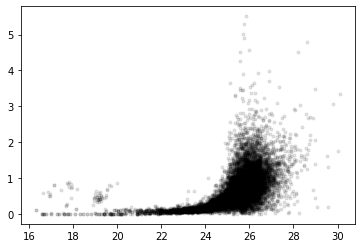

In [133]:
plt.plot(tmp_res.magPsf.nanmedian.values, tmp_res.magPsf.nanstd.values, 'k.', alpha=0.1)
#plt.hist(tmp_res.magPsf.nanstd.values, bins=np.arange(-0.1, 3, 0.1))
plt.show()

In [129]:
# Next: join on objectTable to get classification_extendedness (for star-only selection)

# Is there a way to have the SQL calculate the stats and only return objects whose scatter is higher than some value? (slightly tricky because
# you have only flux in the table, not mag)

